In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.6/914.6 kB 18.5 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Loading the model which was trained on PCB data

In [3]:
model = YOLO('/kaggle/input/yolo8v_model_trained/tensorflow2/default/1/pcb_detection_yolov8_model.pt')  # Adjust the path to your model

## Visualizing the predictions


0: 640x640 3 defects, 16.5ms
Speed: 16.4ms preprocess, 16.5ms inference, 269.4ms postprocess per image at shape (1, 3, 640, 640)


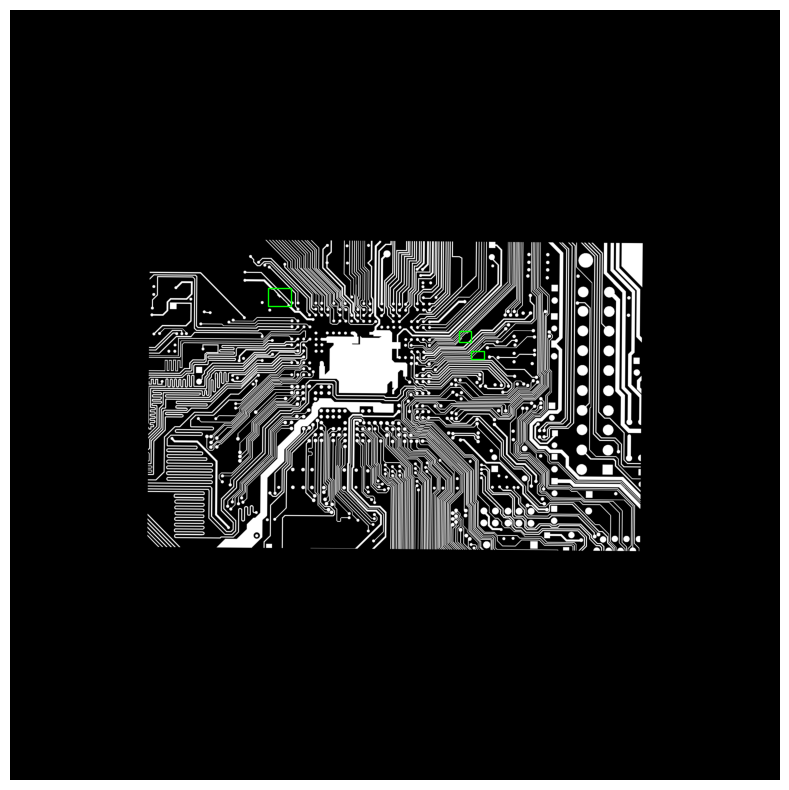


0: 640x640 3 defects, 16.4ms
Speed: 3.7ms preprocess, 16.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


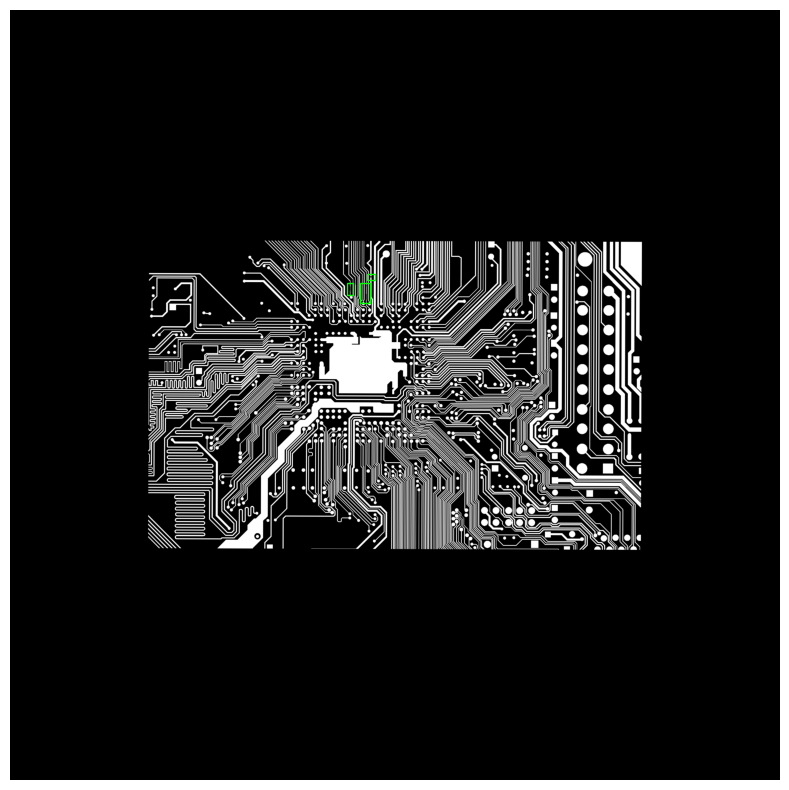


0: 640x640 4 defects, 16.3ms
Speed: 3.6ms preprocess, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


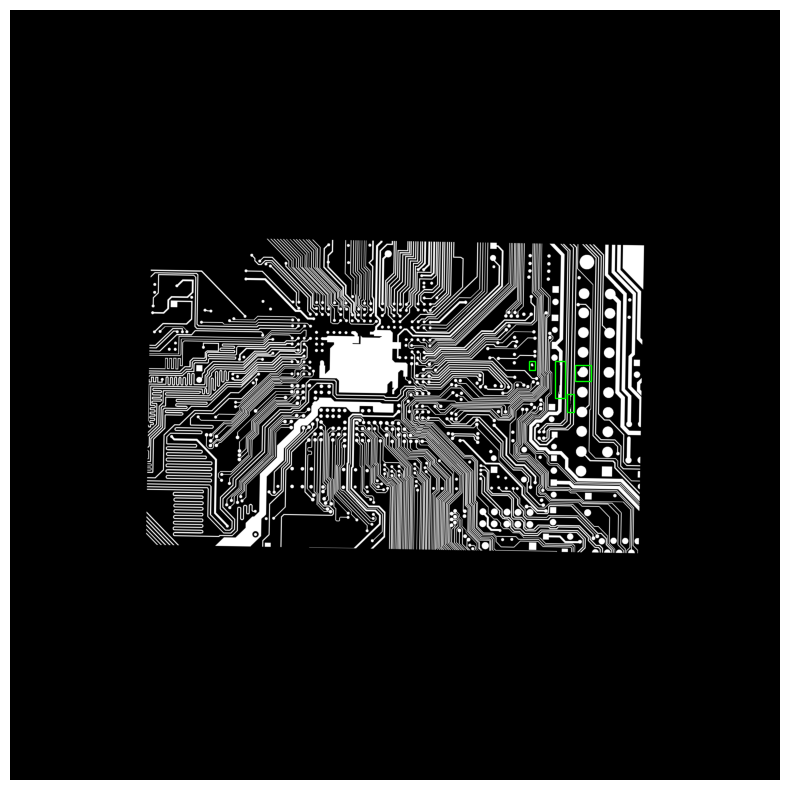

In [4]:
import cv2
import matplotlib.pyplot as plt
from matplotlib import patches
from ultralytics import YOLO

# List of image paths 
image_paths = [
    '/kaggle/input/testing-image/test_set/pcb1_defect_image_1.png',
    '/kaggle/input/testing-image/test_set/pcb2_defect_image_1_.png',
    '/kaggle/input/testing-image/test_set/pcb3_defect_image_1.png',
    
]

# Iterate over the images and visualize the results
for img_path in image_paths:
    img = cv2.imread(img_path)
    
    # Run YOLO predictions on the image
    results = model(img)  # Get YOLO predictions
    
    # Get the original image from results (for correct aspect ratio)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Get bounding boxes for visualizing
    boxes = results[0].boxes.xyxy.cpu().numpy()  # for bounding box coordinates in [x1, y1, x2, y2] format
    
    # Create a figure to display the image with bounding boxes
    fig, ax = plt.subplots(1, figsize=(12, 8))
   # fig, ax = plt.subplots(1, figsize=(img.shape[1] // 50, img.shape[0] // 50))  # Scale the figure to match the image's aspect ratio
    ax.imshow(img_rgb)  # Display the image
    
    # Draw bounding boxes
    for box in boxes:
        x1, y1, x2, y2 = box  # Unpack the coordinates

        # Draw the bounding box with a desired color and thickness
        rect = patches.Rectangle(
            (x1, y1), x2 - x1, y2 - y1,  # Position and size of the box
            linewidth=1, edgecolor='lime', facecolor='none'  
        )
        ax.add_patch(rect)  
    
    # Turn off axis for cleaner visualization
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()


In [10]:
results = model.predict('/kaggle/input/data-val/val')


image 1/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 10.png: 640x640 3 defects, 16.2ms
image 2/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 11.png: 640x640 3 defects, 16.3ms
image 3/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 12.png: 640x640 3 defects, 16.4ms
image 4/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 13.png: 640x640 3 defects, 16.5ms
image 5/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 14.png: 640x640 3 defects, 16.5ms
image 6/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 15.png: 640x640 3 defects, 16.3ms
image 7/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 16.png: 640x640 3 defects, 16.4ms
image 8/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 17.png: 640x640 3 defects, 16.4ms
image 9/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 2.png: 640x640 3 defects, 16.4ms
image 10/60 /kaggle/input/data-val/val/pcb1_defect_image_1 copy 3.png: 640x640 3 defects, 16.4ms
image 11/60 /kaggle/input/data

In [15]:
pip install groq


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=4b09493691ba3646ff5cd1c3f86e34bd2904318c4faecc1a0407d6bc1cb0c4a4
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf
Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install gTTS


Note: you may need to restart the kernel to use updated packages.


## LLM Generated Report about possible PCB defect and solutions with pdf and audio file generation.

In [46]:
import cv2
import base64
import os
import matplotlib.pyplot as plt
from groq import Groq
from ultralytics import YOLO
from fpdf import FPDF
from gtts import gTTS

# Initialize Groq client
client = Groq(api_key="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")

# Function to encode image to base64
def encode_image(image):
    _, buffer = cv2.imencode('.jpg', image)
    return base64.b64encode(buffer).decode("utf-8")

# Function to check for defects
def detect_defects(image_path):
    image = cv2.imread(image_path)  # Read the image from file
    if image is None:
        print("Error: Image not found!")
        return False, None

    
    has_defects = any(result.boxes for result in results)

    # Convert full image to base64 for LLaMA
    encoded_image = encode_image(image)

    return has_defects, image, encoded_image, results


In [47]:
# Function to get AI analysis from Groq API using the SDK
def get_ai_analysis(encoded_image):
    prompt = f"""
    You are an expert PCB defect analyzer. The provided image contains visible bounding boxes, indicating potential defects.

    Task:
    1️ Identify possible PCB defect types based on general knowledge (e.g., missing solder, short circuit, broken trace, component misalignment).
    2️ Explain how these defects could impact the PCB.
    3️ Suggest possible repair solutions and preventive measures.

    Image (Base64 Encoded) for Reference:
    {encoded_image[:100]}... (truncated for size)
    """

    chat_completion = client.chat.completions.create(
        messages=[{"role": "user", "content": prompt}],
        model="llama-3.3-70b-versatile", 
        stream=False,
    )

    return chat_completion.choices[0].message.content


In [48]:
# Function to generate PDF report
def generate_pdf_report(image_path, ai_report, pdf_filename="LLM_generated_pcb_report.pdf"):
    # Create instance of FPDF class
    pdf = FPDF()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.add_page()

    pdf.set_font("Arial", 'B', 16)
    pdf.cell(200, 10, txt="PCB Defect Detection Report", ln=True, align='C')

    # Add AI report
    pdf.ln(10)
    pdf.set_font("Arial", size=12)

    # Remove `###` and `**` from the AI report content
    ai_report_clean = ai_report.replace('###', '').replace('**', '')  # Clean unwanted symbols
    pdf.multi_cell(0, 10, txt="AI-Generated Report:\n" + ai_report_clean)

    # Add image to PDF
    pdf.ln(10)
    pdf.set_font("Arial", 'I', 12)
    pdf.cell(200, 10, txt="Image with detected defects:", ln=True)
    
    # Save image as a temporary file and insert it into the PDF
    temp_img_path = "temp_image.jpg"
    cv2.imwrite(temp_img_path, cv2.imread(image_path))
    pdf.image(temp_img_path, x=10, y=pdf.get_y(), w=180)  
    os.remove(temp_img_path)

    # Output the PDF to file
    pdf.output(pdf_filename)
    print(f"PDF report saved as {pdf_filename}")


In [49]:
# Function to convert text to speech and save as an audio file
def text_to_speech(report_text, filename="LLM_report_audio.mp3"):
    report_text = report_text.encode('utf-8', 'replace').decode('utf-8') 
    tts = gTTS(text=report_text, lang='en')
    tts.save(filename)
    print(f"Audio saved as {filename}")
    
    os.system(f"start {filename}")  


In [50]:
# Main Function
def main(image_path):
    has_defects, image, encoded_image, results = detect_defects(image_path)
    
    if has_defects:
        ai_report = get_ai_analysis(encoded_image)
    else:
        ai_report = "No defects detected in the PCB image."

    ai_report_clean = ai_report.replace('###', '').replace('**', '')  # Clean unwanted symbols

    # Print the clean report to the output
    print("\n📋 AI-Generated Report:\n", ai_report_clean)

    # Generate and save the PDF report
    generate_pdf_report(image_path, ai_report)

    # Convert the AI report text to voice
    text_to_speech(ai_report_clean)

    # Display the image using Matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide the axes for a cleaner view
    plt.show()




📋 AI-Generated Report:
 Based on general knowledge of PCB defects, I'll provide an analysis of the potential defects, their impact, and possible repair solutions and preventive measures.

Possible PCB Defect Types:

1. Missing Solder: The bounding boxes might indicate areas where solder is missing or insufficient, which can cause poor connections between components and the board.
2. Short Circuit: Some bounding boxes could be highlighting short circuits between adjacent tracks or components, which can lead to electrical malfunctions or damage to the board.
3. Broken Trace: The boxes might also indicate broken or cracked traces, which can disrupt the flow of electrical signals and cause component malfunction or failure.
4. Component Misalignment: The bounding boxes could be pointing out components that are not properly aligned or seated, which can lead to poor connections, reduced board reliability, and potentially cause the component to fail.

Impact of Defects:

These defects can sig

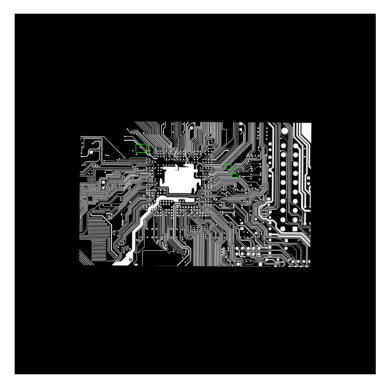

In [51]:
# Run the script
if __name__ == "__main__":
    IMAGE_PATH = "/kaggle/input/llm-testing-images/anomaly_prediction_visualization/pcb1_prediction.png" 
    main(IMAGE_PATH)

# Thank you